<h1>Import Libraries</h1>

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

<h1>Import and Parse Data</h1>

In [109]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [110]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.drop(columns=['customerID'], inplace=True)
data.dropna(inplace=True)

In [113]:
features = data.drop(columns=['Churn'])
targets = data['Churn'].map({'Yes': 1, 'No': 0})
features = pd.get_dummies(features)

In [114]:
features.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet serv

<h1>Split Data into Training and Testing Datasets</h1>

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.30, random_state=100)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4922, 45) (2110, 45) (4922,) (2110,)


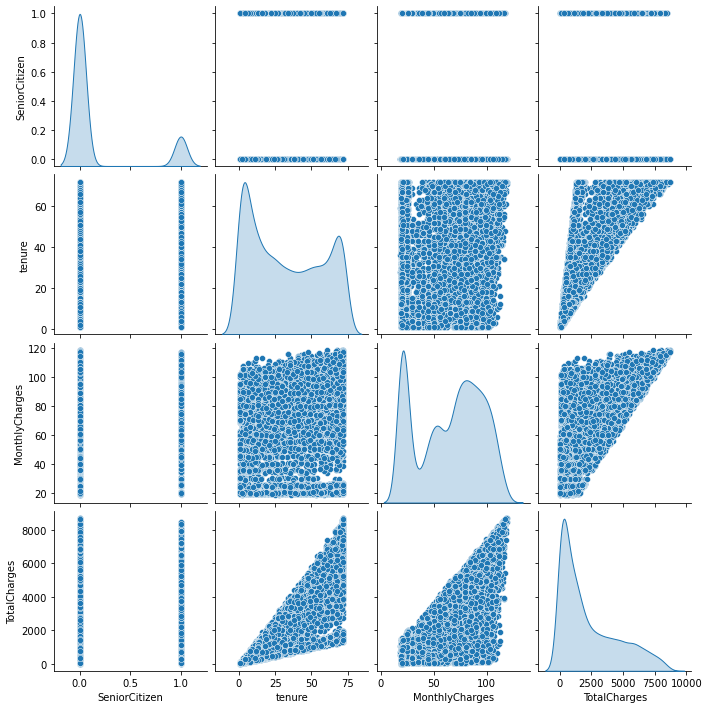

In [118]:
sns.pairplot(data, diag_kind='kde')

<h1>Monthly Charges vs. Churn Rate</h1>

Text(0.5, 1.0, 'Monthly Charges by Churn Classification')

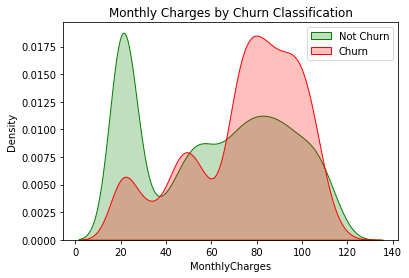

In [119]:
ax = sns.kdeplot(data['MonthlyCharges'][(data['Churn'] == 'No')], color='Green', shade=True)
ax = sns.kdeplot(data['MonthlyCharges'][(data['Churn'] == 'Yes')], color='Red', shade=True)
ax.legend(['Not Churn', 'Churn'], loc='upper right')
ax.set_ylabel('Density')
ax.set_title('Monthly Charges by Churn Classification')

<h1>Total Charges vs. Churn Rate</h1>

Text(0.5, 1.0, 'Total Charges by Churn Classification')

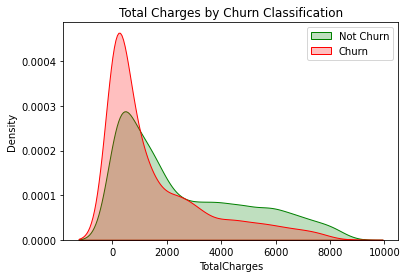

In [120]:
ax = sns.kdeplot(data['TotalCharges'][(data['Churn'] == 'No')], color='Green', shade=True)
ax = sns.kdeplot(data['TotalCharges'][(data['Churn'] == 'Yes')], color='Red', shade=True)
ax.legend(['Not Churn', 'Churn'], loc='upper right')
ax.set_ylabel('Density')
ax.set_title('Total Charges by Churn Classification')

<h1>Develop Keras Model</h1>
<hr>
I'll create a multiple-input deep neural network model, with three layers: 
<ul>
    <li>Normalization Layer</li>
    <li>Two non-linear Dense layers with the ReLU activation function nonlinearity</li>
    <li>A dense linear single output layer</li>
</ul>

In [121]:
def KerasModel(normalized_layer):
    model = tf.keras.Sequential([
        normalized_layer,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [122]:
normalized_layer = tf.keras.layers.Normalization(axis=-1)
normalized_layer.adapt(np.array(X_train))

In [123]:
deep_neural_network = KerasModel(normalized_layer)
deep_neural_network.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_8 (Normalizati (None, 45)                91        
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2944      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 7,260
Trainable params: 7,169
Non-trainable params: 91
_________________________________________________________________


In [130]:
result = deep_neural_network.fit(X_train,
                                 Y_train,
                                 validation_split=0.2,
                                 verbose=0,
                                 epochs=100)

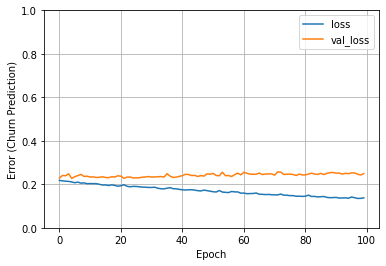

In [141]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error (Churn Prediction)')
  plt.legend()
  plt.grid(True)

plot_loss(result)

In [144]:
accuracy = (1 - deep_neural_network.evaluate(X_test, Y_test, verbose=0)) * 100
print('The Deep Learning Model above has a mean absolute squared error calculation of {val}%'.format(val = round(accuracy,1)))

The Deep Learning Model above has a mean absolute squared error calculation of 73.3%
